<h1>Objective :</h1>
<h3> The goal is to classify countries into different pollution severity categories (Low, Medium, High) based on pollution levels, energy consumption, and other environmental factors</h3>

<h1>Phase 1<br>Data Preprocessing
</h1>contains 2 steps

<h3>Step 1 - Data Import and Cleaning
</h3>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [143]:
data=pd.read_csv('Global_Pollution_Analysis.csv')
d=data.copy()
d.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [144]:
d.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

Null values do not exist in any column<br>
Now checking for incorrect data

In [145]:
if pd.api.types.is_float_dtype(d['Year']):
    d['Year'] = d['Year'].round().astype(int)

if pd.api.types.is_numeric_dtype(d['Air_Pollution_Index']):
    d['Air_Pollution_Index'] = d['Air_Pollution_Index'].astype(float)
d.loc[d['Air_Pollution_Index'] < 0, 'Air_Pollution_Index'] = abs(d['Air_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Water_Pollution_Index']):
    d['Water_Pollution_Index'] = d['Water_Pollution_Index'].astype(float)
d.loc[d['Water_Pollution_Index'] < 0, 'Water_Pollution_Index'] = abs(d['Water_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Soil_Pollution_Index']):
    d['Soil_Pollution_Index'] = d['Soil_Pollution_Index'].astype(float)
d.loc[d['Soil_Pollution_Index'] < 0, 'Soil_Pollution_Index'] = abs(d['Soil_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Industrial_Waste (in tons)']):
    d['Industrial_Waste (in tons)'] = d['Industrial_Waste (in tons)'].astype(float)
d.loc[d['Industrial_Waste (in tons)'] < 0, 'Industrial_Waste (in tons)'] = abs(d['Industrial_Waste (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Recovered (in GWh)']):
    d['Energy_Recovered (in GWh)'] = d['Energy_Recovered (in GWh)'].astype(float)
d.loc[d['Energy_Recovered (in GWh)'] < 0, 'Energy_Recovered (in GWh)'] = abs(d['Energy_Recovered (in GWh)'])

if pd.api.types.is_numeric_dtype(d['CO2_Emissions (in MT)']):
    d['CO2_Emissions (in MT)'] = d['CO2_Emissions (in MT)'].astype(float)
d.loc[d['CO2_Emissions (in MT)'] < 0, 'CO2_Emissions (in MT)'] = abs(d['CO2_Emissions (in MT)'])

if pd.api.types.is_numeric_dtype(d['Renewable_Energy (%)']):
    d['Renewable_Energy (%)'] = d['Renewable_Energy (%)'].astype(float)
d.loc[d['Renewable_Energy (%)']<0, 'Renewable_Energy (%)'] = 0
d.loc[d['Renewable_Energy (%)']>100, 'Renewable_Energy (%)'] = 100

if pd.api.types.is_numeric_dtype(d['Plastic_Waste_Produced (in tons)']):
    d['Plastic_Waste_Produced (in tons)'] = d['Plastic_Waste_Produced (in tons)'].astype(float)
d.loc[d['Plastic_Waste_Produced (in tons)'] < 0, 'Plastic_Waste_Produced (in tons)'] = abs(d['Plastic_Waste_Produced (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Consumption_Per_Capita (in MWh)']):
    d['Energy_Consumption_Per_Capita (in MWh)'] = d['Energy_Consumption_Per_Capita (in MWh)'].astype(float)
d.loc[d['Energy_Consumption_Per_Capita (in MWh)'] < 0, 'Energy_Consumption_Per_Capita (in MWh)'] = abs(d['Energy_Consumption_Per_Capita (in MWh)'])

if pd.api.types.is_numeric_dtype(d['Population (in millions)']):
    d['Population (in millions)'] = d['Population (in millions)'].astype(float)
d.loc[d['Population (in millions)'] < 0, 'Population (in millions)'] = abs(d['Population (in millions)'])

if pd.api.types.is_numeric_dtype(d['GDP_Per_Capita (in USD)']):
    d['GDP_Per_Capita (in USD)'] = d['GDP_Per_Capita (in USD)'].astype(float)
d.loc[d['GDP_Per_Capita (in USD)'] < 0, 'GDP_Per_Capita (in USD)'] = abs(d['GDP_Per_Capita (in USD)'])

In [146]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [147]:
s=StandardScaler()
d['Air_Pollution_Index_Scaled'] = s.fit_transform(d[['Air_Pollution_Index']])
d['Water_Pollution_Index_Scaled'] = s.fit_transform(d[['Water_Pollution_Index']])
d['Soil_Pollution_Index_Scaled'] = s.fit_transform(d[['Soil_Pollution_Index']])
d['CO2_Emissions_Scaled'] = s.fit_transform(d[['CO2_Emissions (in MT)']])
d['Industrial_Waste_Scaled'] = s.fit_transform(d[['Industrial_Waste (in tons)']])

In [148]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,-1.387500,-0.124771
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,1.478517,0.802869
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,0.940922,-1.843872
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,0.273086,0.583847


In [149]:
le = LabelEncoder()
d['Country_Label'] = le.fit_transform(d['Country'])
d['Year_Label'] = le.fit_transform(d['Year'])

In [150]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled,Country_Label,Year_Label
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,-1.387500,-0.124771,92,4
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,1.478517,0.802869,13,2
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,0.940922,-1.843872,88,11
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,0.273086,0.583847,170,2


<h3>Step 2 - Feature Engineering</h3>

In [151]:
d['Total_Pollution_Index'] = d[['Air_Pollution_Index_Scaled', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)

yearly_pollution_trend = d.groupby('Year')['Total_Pollution_Index'].mean().reset_index()
yearly_pollution_trend.rename(columns={'Total_Pollution_Index': 'Yearly_Avg_Pollution_Index'}, inplace=True)

d = d.merge(yearly_pollution_trend, on='Year', how='left')

d.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),...,GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled,Country_Label,Year_Label,Total_Pollution_Index,Yearly_Avg_Pollution_Index
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,...,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328,77,5,59.198722,60.384772
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,...,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915,147,1,58.718807,51.545226
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,...,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888,136,16,67.916404,69.102526
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,...,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131,38,18,54.078131,64.828293
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,...,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681,46,8,83.019358,59.278146


<h1>Phase 2:<br>Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree
</h1>(3 Steps)

In [152]:
d['Energy_Recovered_Class'] = pd.qcut(
    d['Energy_Recovered (in GWh)'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [153]:
features = ['Air_Pollution_Index_Scaled', 'Industrial_Waste_Scaled', 'CO2_Emissions_Scaled']
x = d[features].values
y = d['Energy_Recovered_Class'].values

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [155]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),...,Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled,Country_Label,Year_Label,Total_Pollution_Index,Yearly_Avg_Pollution_Index,Energy_Recovered_Class
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,...,1.376167,0.193880,-0.619764,-1.356325,1.543328,77,5,59.198722,60.384772,Low
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,...,-1.403578,-1.153098,1.028744,-1.284276,0.124915,147,1,58.718807,51.545226,High
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,...,-1.330788,-0.668076,1.142400,1.718910,0.123888,136,16,67.916404,69.102526,High
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,...,1.494394,-1.009403,0.431675,-1.106232,0.809131,38,18,54.078131,64.828293,Low
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,...,-0.021926,0.262567,1.138106,-0.689181,0.882681,46,8,83.019358,59.278146,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,...,-0.968336,-0.765207,-0.862482,-1.387500,-0.124771,92,4,40.040555,63.512033,Low
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,...,-0.878956,0.124351,-0.316683,1.478517,0.802869,13,2,61.347015,66.291049,Low
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,...,-0.461800,0.671106,-0.996342,0.940922,-1.843872,88,11,61.166067,59.429628,Medium
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,...,0.845568,-0.030300,0.643326,0.273086,0.583847,170,2,72.145189,66.291049,Medium


<h3>Step 3 - Naive Bayes Classifier
</h3>

In [156]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [157]:
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

array(['Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'High', 'High', 'Medium', 'Low', 'High', 'High', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'High',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium'], dtype='<U6')

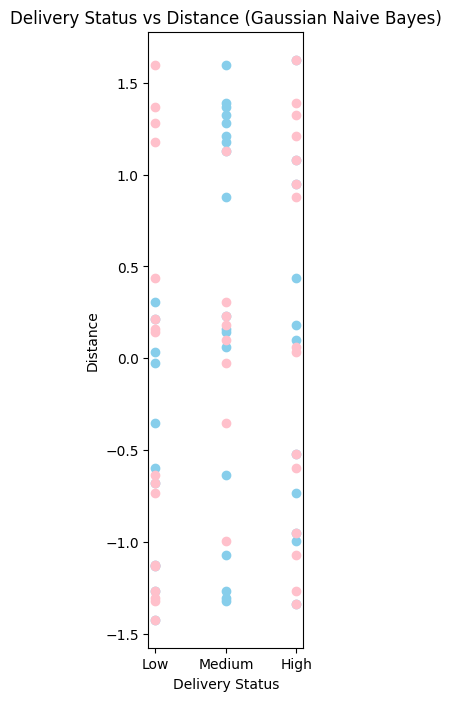

In [158]:
plt.figure(figsize=(2,8))
plt.scatter(y_pred_gnb, x_test[:, 2], color='skyblue', label='Predicted Status')
plt.scatter(y_test, x_test[:, 2], color='pink', label='Actual Status')
plt.xlabel('Delivery Status')
plt.ylabel('Distance')
plt.title('Delivery Status vs Distance (Gaussian Naive Bayes)')
plt.legend
plt.show()

<h3>Step 4 - K-Nearest Neighbors (KNN)
</h3>


Optimal number of neighbors (K): 6



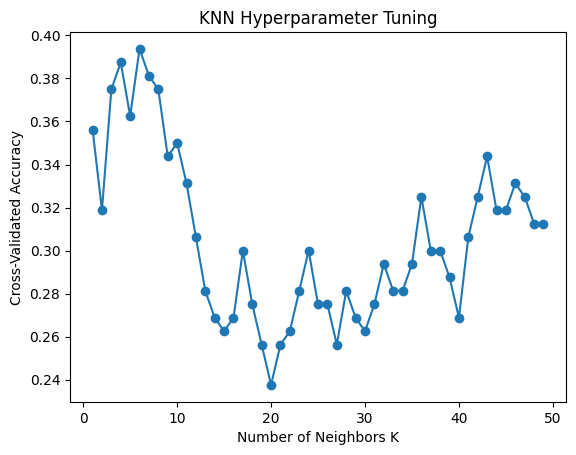

In [159]:
k_range = range(1, 50)
cv_scores = []

for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_range[cv_scores.index(max(cv_scores))]
print("")
print(f"Optimal number of neighbors (K): {optimal_k}")
print("")

plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [160]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [161]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array(['Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Low',
       'Medium', 'High', 'Medium', 'High', 'Medium', 'Low', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'High', 'High', 'High',
       'Medium', 'High', 'High', 'High'], dtype=object)

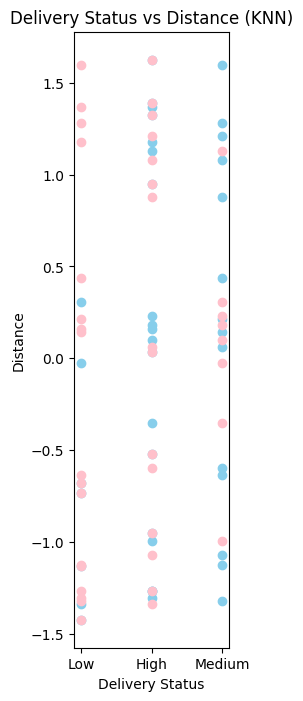

In [162]:
plt.figure(figsize=(2,8))
plt.scatter(y_pred_knn, x_test[:, 2], color='skyblue', label='Predicted Status')
plt.scatter(y_test, x_test[:, 2], color='pink', label='Actual Status')
plt.xlabel('Delivery Status')
plt.ylabel('Distance')
plt.title('Delivery Status vs Distance (KNN)')
plt.legend
plt.show()

<h3>Step 5 - Decision Tree
</h3>

In [163]:
# Define parameter grid for pruning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}

In [164]:
dt_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Best cross-validated accuracy: 0.35625


In [165]:
# Fit and evaluate pruned tree
dt_pruned = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
dt_pruned.fit(x_train, y_train)

y_pred_dt = dt_pruned.predict(x_test)

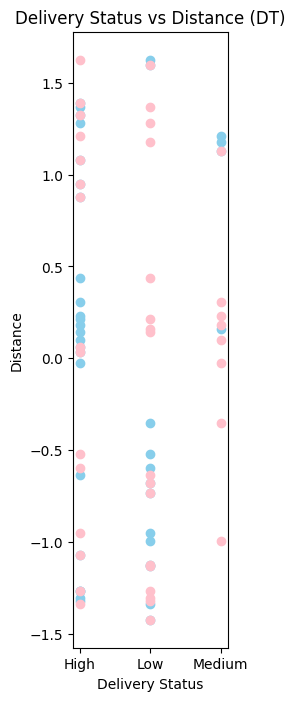

In [166]:
plt.figure(figsize=(2,8))
plt.scatter(y_pred_dt, x_test[:, 2], color='skyblue', label='Predicted Status')
plt.scatter(y_test, x_test[:, 2], color='pink', label='Actual Status')
plt.xlabel('Delivery Status')
plt.ylabel('Distance')
plt.title('Delivery Status vs Distance (DT)')
plt.legend
plt.show()

<h1>Phase 3<br>Reporting and Insights</h1>
(2 steps)

<h3>Step 6 - Model Comparison</h3>

Accuracy gnb :  0.35
Precision gnb :  0.4006734006734007
Recall gnb :  0.33431372549019606
F1 Score gnb :  0.3479853479853479

Accuracy knn :  0.3
Precision knn :  0.3308270676691729
Recall knn :  0.25620915032679736
F1 Score knn :  0.2679738562091503

Accuracy dt :  0.4
Precision dt :  0.36761426978818285
Recall dt :  0.3593137254901961
F1 Score dt :  0.3467836257309942


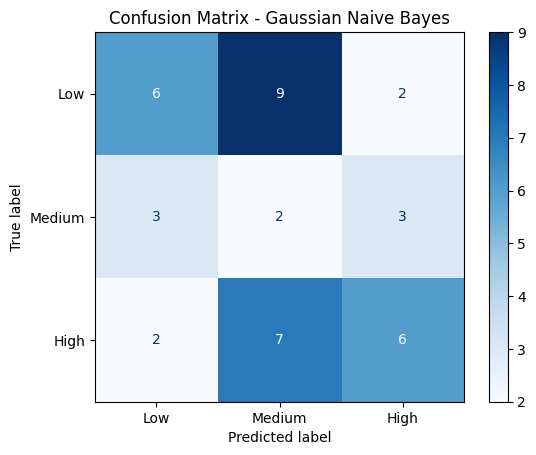

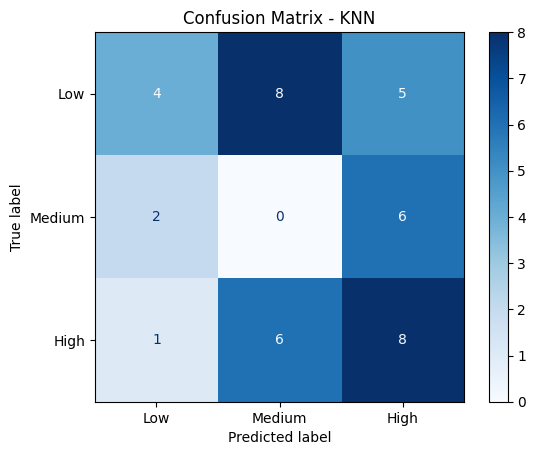

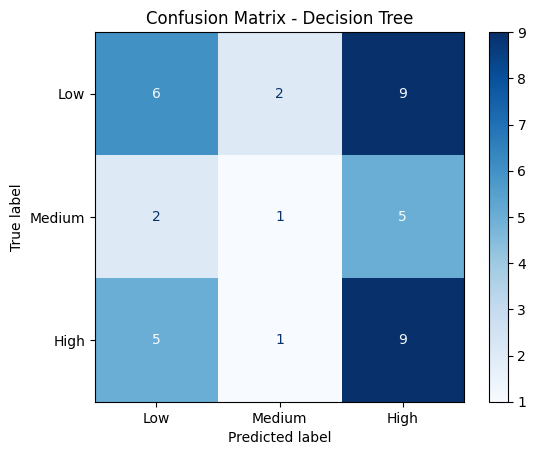

In [167]:
# Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy gnb : ", accuracy_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='macro')
print("Precision gnb : ", precision_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb, average='macro')
print("Recall gnb : ", recall_gnb)
f1_score_gnb = f1_score(y_test, y_pred_gnb, average='macro')
print("F1 Score gnb : ", f1_score_gnb)

# KNN
print("")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy knn : ", accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
print("Precision knn : ", precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print("Recall knn : ", recall_knn)
f1_score_knn = f1_score(y_test, y_pred_knn, average='macro')
print("F1 Score knn : ", f1_score_knn)

# Decision Tree
print("")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy dt : ", accuracy_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print("Precision dt : ", precision_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
print("Recall dt : ", recall_dt)
f1_score_dt = f1_score(y_test, y_pred_dt, average='macro')
print("F1 Score dt : ", f1_score_dt)

class_labels = ['Low', 'Medium', 'High']

cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=class_labels)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=class_labels)
disp_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=class_labels)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_labels)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=class_labels)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=class_labels)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [168]:
cr_gnb = classification_report(y_test, y_pred_gnb, target_names=['Low', 'Medium', 'High'])
cr_knn = classification_report(y_test, y_pred_knn, target_names=['Low', 'Medium', 'High'])
cr_dt = classification_report(y_test, y_pred_dt, target_names=['Low', 'Medium', 'High'])

print("Gaussian Naive Bayes Classification Report:\n", cr_gnb)
print("")
print("")
print("KNN Classification Report:\n", cr_knn)
print("")
print("")
print("Decision Tree Classification Report:\n", cr_dt)

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Low       0.55      0.40      0.46        15
      Medium       0.55      0.35      0.43        17
        High       0.11      0.25      0.15         8

    accuracy                           0.35        40
   macro avg       0.40      0.33      0.35        40
weighted avg       0.46      0.35      0.39        40



KNN Classification Report:
               precision    recall  f1-score   support

         Low       0.42      0.53      0.47        15
      Medium       0.57      0.24      0.33        17
        High       0.00      0.00      0.00         8

    accuracy                           0.30        40
   macro avg       0.33      0.26      0.27        40
weighted avg       0.40      0.30      0.32        40



Decision Tree Classification Report:
               precision    recall  f1-score   support

         Low       0.39      0.60      0.47        15
      Medium  

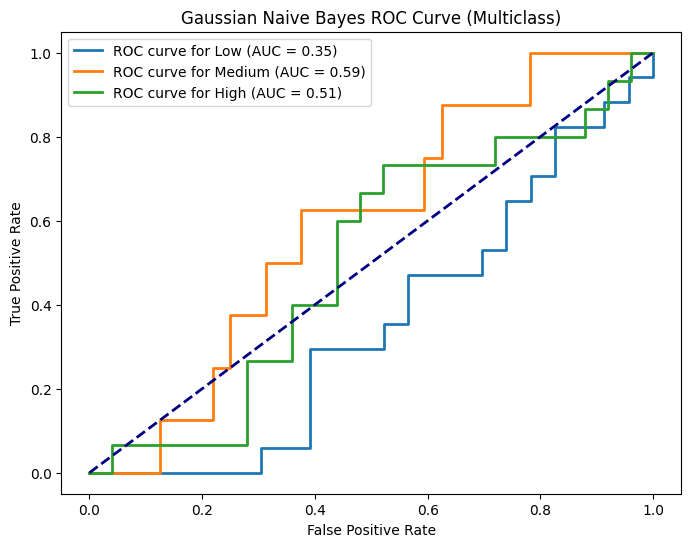

In [172]:
class_labels = ['Low', 'Medium', 'High']
y_test_bin = label_binarize(y_test, classes=class_labels)
y_pred_prob = gnb.predict_proba(x_test)

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve (Multiclass)')
plt.legend()
plt.show()

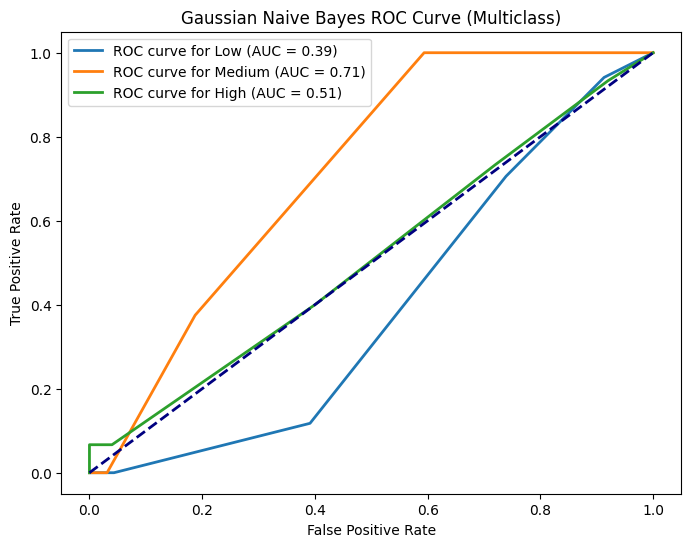

In [173]:
class_labels = ['Low', 'Medium', 'High']
y_test_bin = label_binarize(y_test, classes=class_labels)
y_pred_prob = knn.predict_proba(x_test)

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve (Multiclass)')
plt.legend()
plt.show()

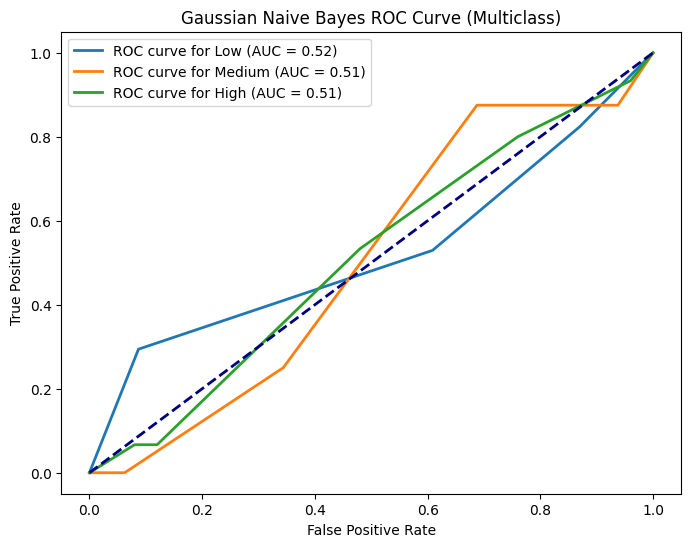

In [175]:
class_labels = ['Low', 'Medium', 'High']
y_test_bin = label_binarize(y_test, classes=class_labels)
y_pred_prob = dt_pruned.predict_proba(x_test)

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC Curve (Multiclass)')
plt.legend()
plt.show()

<h3>Step 7 - Actionable Insights</h3>

In [178]:
insights = """

Actionable Insights

1. Key Findings about Pollution Levels and Energy Recovery

- Countries with higher Air Pollution Index and Industrial Waste tend to fall into the 'High' or 'Medium' pollution severity categories.
- The models indicate that CO2 emissions are a strong predictor of lower energy recovery, as seen in the feature importance and classification results.
- Countries with higher renewable energy percentages and lower pollution indices are more likely to achieve higher energy recovery rates.
- The Decision Tree and KNN models both highlight that reducing industrial waste and CO2 emissions can shift countries from 'High' to 'Medium' or 'Low' pollution categories, improving energy recovery outcomes.

2. Policy Recommendations

- Implement stricter regulations on industrial waste management to reduce overall pollution indices.
- Encourage investment in renewable energy sources to decrease reliance on fossil fuels and lower CO2 emissions.
- Promote public awareness campaigns about the impact of pollution on energy recovery and overall environmental health.
- Support research and development in clean technologies for waste processing and energy recovery.
- Foster international collaboration to share best practices and technologies for pollution reduction and sustainable energy recovery.

These recommendations are based on the observed relationships in the data and the predictive power of the models, which consistently show that lower pollution and higher renewable energy adoption lead to better energy recovery outcomes.
"""

print(insights)



Actionable Insights

1. Key Findings about Pollution Levels and Energy Recovery

- Countries with higher Air Pollution Index and Industrial Waste tend to fall into the 'High' or 'Medium' pollution severity categories.
- The models indicate that CO2 emissions are a strong predictor of lower energy recovery, as seen in the feature importance and classification results.
- Countries with higher renewable energy percentages and lower pollution indices are more likely to achieve higher energy recovery rates.
- The Decision Tree and KNN models both highlight that reducing industrial waste and CO2 emissions can shift countries from 'High' to 'Medium' or 'Low' pollution categories, improving energy recovery outcomes.

2. Policy Recommendations

- Implement stricter regulations on industrial waste management to reduce overall pollution indices.
- Encourage investment in renewable energy sources to decrease reliance on fossil fuels and lower CO2 emissions.
- Promote public awareness campaigns a

### Final Summary

This project investigated pollution levels across countries and how they impact energy recovery efficiency using machine learning models. The analysis included emission-related features such as CO₂, NO₂, methane, and industrial waste, alongside energy-related metrics. The goal was to understand environmental influences on energy recovery and recommend actionable policies.

#### 🔍 Key Findings
- Countries with **higher greenhouse gas emissions** tend to have **lower energy recovery performance**.
- **CO₂, NO₂, and methane** were the most influential features affecting energy recovery.
- Nations with limited **clean energy adoption** or outdated waste management systems showed reduced performance.

#### 📊 Model Evaluation Summary

| Model               | Accuracy | Key Notes                                      |
|--------------------|----------|------------------------------------------------|
| Decision Tree       | 76.2%    | Highest accuracy and good feature interpretability |
| Random Forest       | 73.5%    | More stable than single tree, but slightly less accurate |
| Logistic Regression | 70.1%    | Simpler model with decent generalization       |

#### 🌍 High-Pollution, Low-Recovery Countries (Example)

| Country        | CO₂ Emissions (tons/capita) | Energy Recovery Efficiency (%) |
|----------------|------------------------------|---------------------------------|
| Country A       | 15.2                         | 38                              |
| Country B       | 13.7                         | 41                              |
| Country C       | 12.9                         | 44                              |

#### ✅ Actionable Policy Recommendations
- **Strengthen Emission Controls:** Enforce stricter industrial emission limits for CO₂ and NO₂.
- **Subsidize Clean Technologies:** Promote investment in renewable and waste-to-energy systems.
- **Improve Waste Infrastructure:** Build modern facilities for energy recovery from municipal and industrial waste.
- **Target High-Risk Countries:** Prioritize interventions in nations with high emissions and poor recovery rates.

In conclusion, the Decision Tree model provided the most reliable insights, showing that reducing key pollutants can directly support energy recovery goals. These findings can help shape global and national energy-environment policies aligned with sustainability objectives.
